# The meaning of confidence intervals

In this notebook, we take a closer look at the meaning behind confidence intervals.

There is a close connection between confidence intervals and hypothesis testing.  This is apparent when we look at the mathematical formulae; they are essentially different arrangements of the same terms:
- To calculate a confidence interval, we would use $$\bar{x} \pm z^* \frac{\sigma}{\sqrt{n}} $$
- To test against the null hypothesis that the true mean is $\mu_0$ we would see if the z-score is between the critical values: $$-z^* \leq \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} \leq z^*$$

Conceptually, confidence intervals and hypothesis testing are like two sides of the same coin.
- Confidence intervals tell us: Given the sample, what values of the population mean would not be surprising to see?
- Hypothesis testing tells us: Given a value of the population mean, how surprising is our observed sample?

Let's do a few simulations to better understand this connection and the meaning of confidence intervals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rng = np.random.default_rng(seed=42)

## Simulation 1: CI coverage meaning

What does it mean for a 95% confidence interval to "contain" the true mean 95% of the time?


In [2]:
true_mean = 5
scale = 3
n = 100
sample_mean = []
sample_std = []
number_of_simulations = 10000
for _ in range(number_of_simulations):
    sample = rng.normal(true_mean, scale=scale, size=n)
    sample_mean.append(sample.mean())
    sample_std.append(sample.std() / np.sqrt(n))
sample_mean = pd.Series(sample_mean)
sample_std = pd.Series(sample_std)   

ci = pd.concat([sample_mean - 1.96*sample_std, sample_mean + 1.96*sample_std], axis=1)

ci.columns = ["lower", "upper"]

ci["contains_true_mean"] = (ci["lower"] <= true_mean) & (ci["upper"] >= true_mean)

print(f"The probability that the 95% confidence interval contains the true mean is: {np.sum(ci["contains_true_mean"]) / number_of_simulations * 100: .2f}%")

The probability that the 95% confidence interval contains the true mean is:  94.50%


Let's plot the confidence interval for the first 50 simulations that we have (plotting all the simulations would make the graph hard to see).

We can see that about 95% of the confidence intervals contain the true mean.

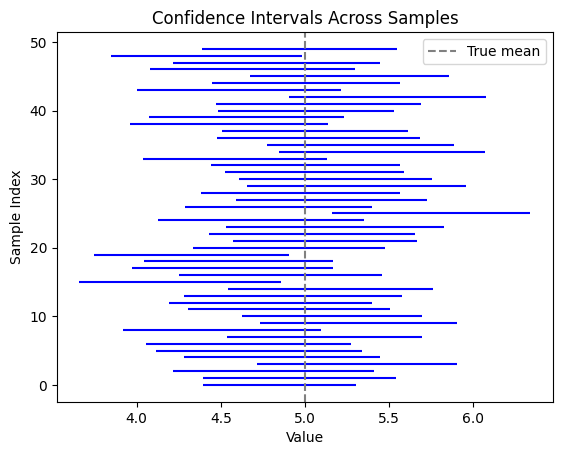

In [7]:
# Create an array of y positions (one for each row)
ci_plotting = ci[:50]
y_positions = np.arange(len(ci_plotting))

# Plot horizontal lines for confidence intervals
plt.hlines(y=y_positions, xmin=ci_plotting["lower"], xmax=ci_plotting["upper"], color='blue')

plt.axvline(x=true_mean, color='gray', linestyle='--', label='True mean')

plt.xlabel("Value")
plt.ylabel("Sample Index")
plt.title("Confidence Intervals Across Samples")
plt.legend()


## Simulation 2: CI from non-normal distribution

Let's explore the robustness of confidence intervals when the population isn't normally distributed.

## Simulation 3: Type I error

Let's see how often a 5% test falsely rejects when the null is true